In [84]:
# this function should get as an input marameter a mask, and return a percentage that how much of the mask is filled

In [85]:
import glob
import pydicom as pdcm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [86]:
ANNOTATED_FILES_PATH = "../data/masks/"
DCM_FILES_PATH = "../data/dcms/"

Kellenek az egyedi azonositoi az annotalt szeleteknek amikkel dolgozni fogunk.

In [87]:
mask_filenames = glob.glob(ANNOTATED_FILES_PATH + "*.png")
names = [i.split('/')[-1][:-4] for i in mask_filenames]
print('names =', names)
print('{} darab annotalt szeletunk van.'.format(len(names)))

names = ['255', '267', '278', '288', '292', '459', '463', '464', '473', '4935', '4938', '4942', '4944', '4946', '4953', '4957', '4958', '4966', '4970', '4976', '504', '523', '6436', '6444', '6459', '6461', '6465', '6473']
28 darab annotalt szeletunk van.


In [88]:
'''
Egy utvonal alapjan beolvas egy maskot es hasznalhatova alakitja.
'''
def readin_mask(path):
    mask = plt.imread(path, 0)
    try:
        mask = mask[:,:,3]
    except IndexError:
        mask = mask[:,:,2]
    mask = mask.astype(np.bool)
    #mask = ~mask
    return mask

In [89]:
'''
A dicom fejlecbol ki kell szamolnom a Hounsfield ertekeket a kovetkezo keplettel:
HU = grayvalue * slope + intercept
'''
def get_image_from_dcm(dcm):
    intercept = int(dcm.RescaleIntercept)
    slope = int(dcm.RescaleSlope)
    mypixels = dcm.pixel_array * slope + intercept
    return mypixels

Beolvasok minden DICOM filet es minden kepet egy listaba, hogy memoriaban legyenek.

In [90]:
# maybe dictionaries would be better
def get_dcms():
    return [pdcm.dcmread(DCM_FILES_PATH + name + '.dcm') for name in names]
dcms = get_dcms()
images = []
image_masks = []
for i in names:
    original_dcm = pdcm.dcmread(DCM_FILES_PATH + i + '.dcm')
    dcms.append(original_dcm)
    images.append(get_image_from_dcm(original_dcm))
    image_masks.append(readin_mask(ANNOTATED_FILES_PATH + i + ".png"))

Itt az elso szelet es a hozzatartozo mask kiplotolva.

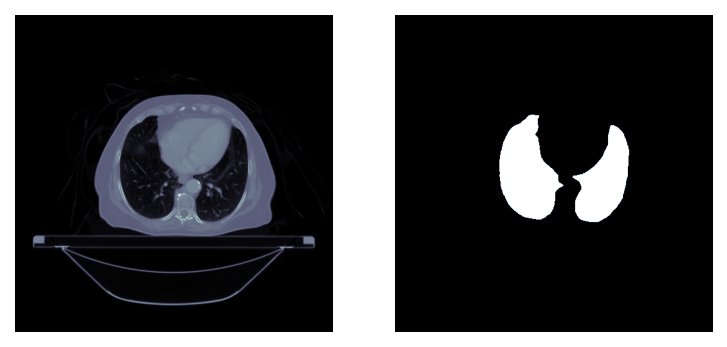

In [91]:
fig, axs = plt.subplots(nrows=1, ncols=2, dpi=150)
[axi.set_axis_off() for axi in axs]
axs[0].imshow(images[0], cmap=plt.cm.bone)
axs[1].imshow(image_masks[0], cmap=plt.cm.bone)

Egyszeru meresi adat a mask-unkrol.

In [92]:
def get_filledarea_ratio(mask):
    '''
    mask - numpy array where the nonzero values represent the actual lung
    return - float number between 0 - 1
    '''
    return np.count_nonzero(mask) / (mask.shape[0]*mask.shape[1])

In [93]:
ratios = [f'{get_filledarea_ratio(mask)*100:.3}' for mask in image_masks]
print(ratios)

['7.3', '7.31', '7.26', '7.51', '7.35', '5.82', '5.73', '6.06', '5.96', '8.03', '9.88', '9.01', '10.6', '7.84', '5.55', '6.87', '7.62', '8.39', '6.24', '6.56', '7.94', '7.92', '11.3', '12.1', '10.6', '10.4', '10.7', '9.99']
